In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import pyDOE
from sepia.SepiaModelSetup import setup_model
from sepia.SepiaData import SepiaData
import sepia.SepiaPlot as SepiaPlot

In [33]:
import os
datadir = os.getcwd()+"/data/ball_drop_2/"
# experimental data
with open(datadir+'fieldDat15x6gparam.txt','r') as f:
    field_data = np.loadtxt(f)
with open(datadir+'desNative4x2Rrho.txt','r') as f:
    x = np.loadtxt(f) # x = {R, rho_ball}
x_obs = x

y_obs = [np.array(field_data[0:3,4]),np.array(field_data[3:6,4]),\
         np.array(field_data[6:12,4]),np.array(field_data[12:,4])]
h_obs = [np.array(field_data[0:3,3]),np.array(field_data[3:6,3]),\
         np.array(field_data[6:12,3]),np.array(field_data[12:,3])]# observed heights

# simulated data
with open(datadir+'desNative80x4Cg.txt','r') as f:
    sim_data = np.loadtxt(f)
x_sim = sim_data[:,0:2] # x = {R, rho_ball}
t_sim = sim_data[:,2:4] # t = {C, g}
with open(datadir+'simHeights101x1','r') as f:
    h_sim = np.loadtxt(f)
with open(datadir+'sims101x80Cg.txt','r') as f:
    y_sim = np.loadtxt(f).T

# create sepia data object
data = SepiaData(x_sim = x_sim, t_sim = t_sim, y_ind_sim = h_sim, y_sim = y_sim,\
                 x_obs = x, y_obs = y_obs, y_ind_obs = h_obs)

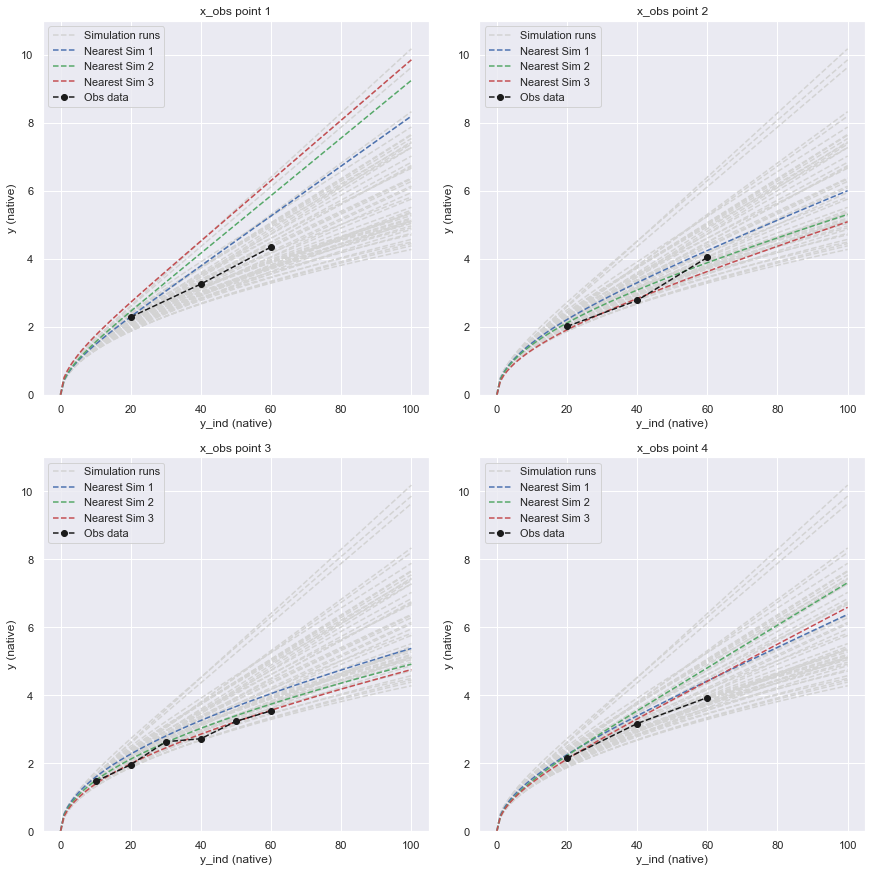

In [34]:
data.plot_data(x_min = -5, x_max = 105, y_min = 0, y_max = 11)

(Text(0, 0.5, 'C'), Text(0.5, 1.0, 'Simulation Design'))

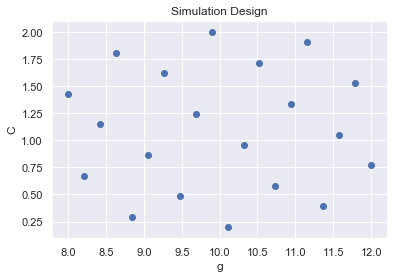

In [35]:
plt.scatter(t_sim[0:20,1],t_sim[0:20,0])
plt.xlabel("g");plt.ylabel("C"),plt.title("Simulation Design")

In [36]:
data.transform_xt()
data.standardize_y()

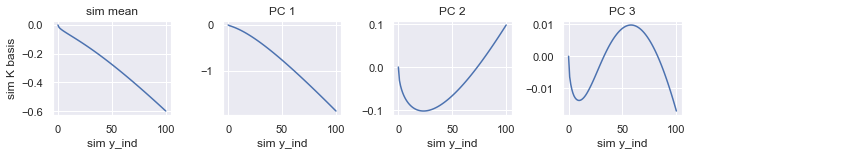

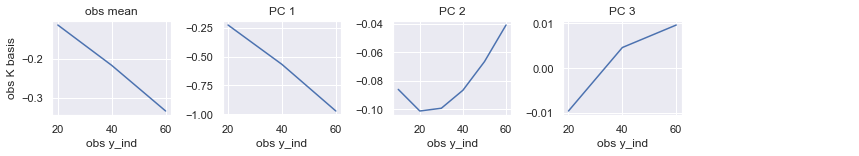

In [37]:
data.create_K_basis(3)
data.plot_K_basis()

In [38]:
data.create_D_basis('linear')
print(data)

This SepiaData instance implies the following:
This is a simulator and obs model, sim y dimension 101, obs y dimension ragged
n  =     4 (number of observed data)
m  =    80 (number of simulated data)
p  =     2 (number of inputs)
q  =     2 (number of additional simulation inputs to calibrate)
pu =     3 (transformed response dimension)
pv =     2 (transformed discrepancy dimension)



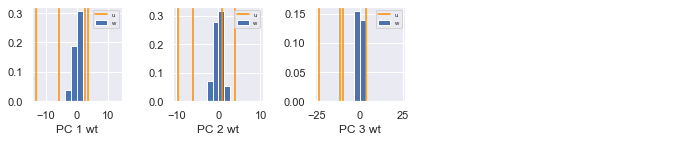

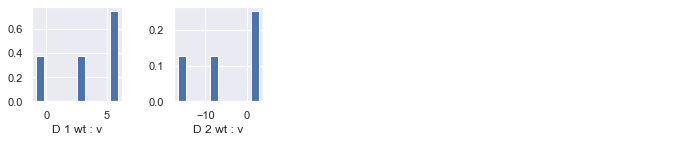

In [39]:
data.plot_K_weights()

Plotting up to 5 pairs. Change with parameter 'max_plots'


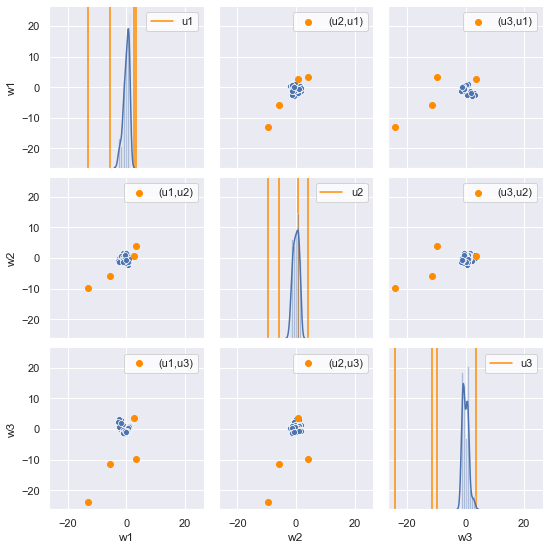

In [40]:
data.plot_u_w_pairs()

In [41]:
model = setup_model(data)
print(model.data.obs_data.K)
cachefile_name='ball_drop_2_ragged.pkl'
import os.path
import pickle
if os.path.isfile(cachefile_name):
   model=pickle.load(open(cachefile_name, "rb" ))
else:
    model.tune_step_sizes(50, 20)
    model.do_mcmc(5000)
    pickle.dump(model, open( cachefile_name, "w+b" ))

Step size tuning:   0%|          | 0/50 [00:00<?, ?it/s]

lamWOs initialized outside default bounds [60, 1e5]; setting initial value to 1e5 - 1.
[array([[-0.22635853, -0.56830172, -0.97331744],
       [-0.10137277, -0.08673501, -0.04076598],
       [-0.00960002,  0.00459297,  0.00962363]]), array([[-0.22635853, -0.56830172, -0.97331744],
       [-0.10137277, -0.08673501, -0.04076598],
       [-0.00960002,  0.00459297,  0.00962363]]), array([[-0.09569867, -0.22635853, -0.38676816, -0.56830172, -0.76511711,
        -0.97331744],
       [-0.08612771, -0.10137277, -0.09941848, -0.08673501, -0.06655729,
        -0.04076598],
       [-0.01371276, -0.00960002, -0.00208593,  0.00459297,  0.00867074,
         0.00962363]]), array([[-0.22635853, -0.56830172, -0.97331744],
       [-0.10137277, -0.08673501, -0.04076598],
       [-0.00960002,  0.00459297,  0.00962363]])]
Starting tune_step_sizes...
Default step sizes:
theta
[[0.2 0.2]]
betaV
[[0.1]
 [0.1]]
betaU
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
lamVz
[[10.]]
lamUz
[[5. 5. 5.]]


MCMC sampling:   0%|          | 0/5000 [00:00<?, ?it/s]

Done with tune_step_size.
Selected step sizes:
theta
[[0.25821864 0.50811236]]
betaV
[[0.46806195]
 [0.74570991]]
betaU
[[0.18589366 0.04204512 0.41909572]
 [0.36039506 0.09028535 0.55704672]
 [0.08629085 0.21661058 0.48083243]
 [0.0345033  0.13055313 0.03389881]]
lamVz
[[5224.97027544]]
lamUz
[[0.2805086  0.37797237 0.65159327]]
lamWs
[[12605.4434567  10719.07911531  6336.98227224]]
lamWOs
[[165.76640141]]
lamOs
[[198.86659743]]


MCMC sampling: 100%|██████████| 5000/5000 [01:30<00:00, 55.13it/s]


In [42]:
samples_dict = {p.name: p.mcmc_to_array(trim=1000,untransform_theta=True) for p in model.params.mcmcList}

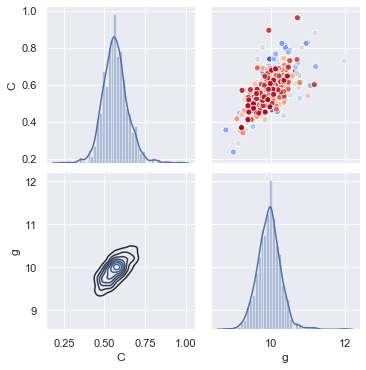

In [43]:
theta_names = ['C','g']
SepiaPlot.theta_pairs(samples_dict,theta_names)

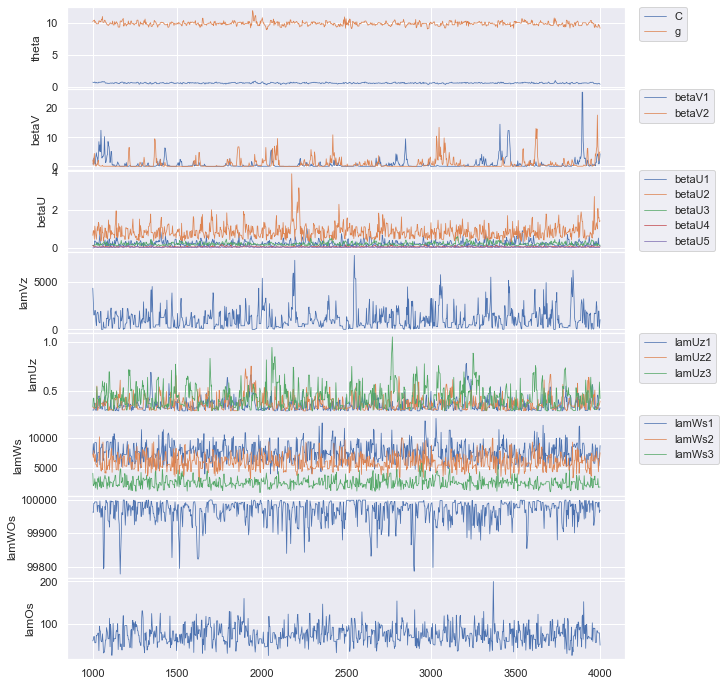

In [45]:
SepiaPlot.mcmc_trace(samples_dict,theta_names,start=1000,n_to_plot=1000,max_print=5)

In [46]:
p_stats = SepiaPlot.param_stats(samples_dict,theta_names,q1=.05,q2=.95,digits=4)
print(np.round(p_stats,4))

                mean         sd  0.05 quantile  0.95 quantile
C             0.5667     0.0776         0.4525         0.6923
g             9.9511     0.3125         9.4521        10.4595
betaV_1       0.8381     2.0135         0.0053         4.0367
betaV_2       0.9321     2.0273         0.0029         4.4375
betaU_1       0.2476     0.1377         0.0976         0.5156
betaU_2       0.8513     0.3360         0.4423         1.4518
betaU_3       0.2164     0.0735         0.1292         0.3624
betaU_4       0.0746     0.0234         0.0460         0.1196
betaU_5       0.0532     0.0272         0.0212         0.1065
betaU_6       0.1139     0.0530         0.0482         0.2196
betaU_7       0.8820     0.1703         0.6343         1.1928
betaU_8       0.3497     0.0803         0.2369         0.4971
betaU_9       0.6103     0.3221         0.2713         1.2363
betaU_10      0.8678     0.4766         0.3465         1.8205
betaU_11      2.7283     0.5076         1.9701         3.6297
betaU_12